In [32]:
import tensorflow as tf
import tensorflow.nn as nn

import keras
import keras.datasets as datasets
import keras.utils as utils
import keras.models as models
import keras.layers as layers

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'1.13.1'

In [7]:
# Import predefined dataset and create tensors for it
mnist = datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


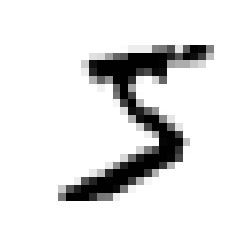

In [10]:
# Demonstrate the dataset
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [12]:
# Normalize the image pixel data
x_train = utils.normalize(x_train, axis=1)
x_test  = utils.normalize(x_test,  axis=1)

In [23]:
# Build the model architecture

model = models.Sequential()

# Input layer to flatten the image to 1 dimension
model.add(layers.Flatten())

# Two hidden layers that are identical
model.add(layers.Dense(128, activation=nn.relu))
model.add(layers.Dense(128, activation=nn.relu))

# Output layer using softmax for a probability distribution
model.add(layers.Dense(10, activation=nn.softmax))

In [24]:
# Training parameters
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.2587 - acc: 0.9246
Epoch 2/3
60000/60000 [==============================] - 3s 54us/step - loss: 0.1069 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 3s 55us/step - loss: 0.0726 - acc: 0.9774


In [25]:
# Take validation loss and accuract on the testing portion of data
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 23us/step
0.09356558708976954 0.9743


In [28]:
# Save the weights of the model super easily
model.save('mnist_2_layer.model')

In [29]:
# Load a model with the name we just saved
new_model_instance = models.load_model('mnist_2_layer.model')

In [31]:
# Create a set of raw forward pass results
predictions = new_model_instance.predict([x_test])

2


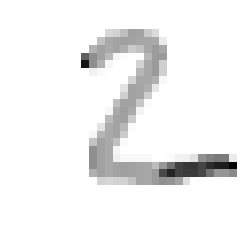

In [34]:
print(np.argmax(predictions[1]))

plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.axis("off")
plt.show()